In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/EDA/zomato.csv"

In [3]:
df = pd.read_csv(path, encoding='latin-1')
df.size, df.shape

(200571, (9551, 21))

In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# data analysis operation
1. find the missing valus
2. explore about the categorical variables
3. explore about the numerical variables
4. find relationship


In [6]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [7]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [9]:
df_country = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EDA/Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
final_df = pd.merge(df, df_country, on='Country Code', how="left")

In [11]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
final_df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [13]:
final_df.Country.value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24


In [14]:
country_names = final_df.Country.value_counts().index
country_values = final_df.Country.value_counts().values

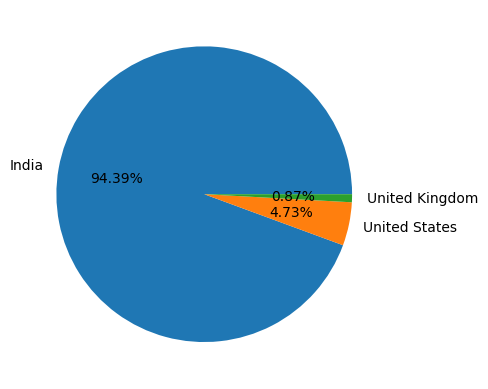

In [15]:
plt.pie(country_values[:3], labels = country_names[:3], autopct="%1.2f%%")
plt.show()

In [16]:
ratings = final_df.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns={0:'Rating count'})

In [17]:
ratings.head(3)

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2


<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

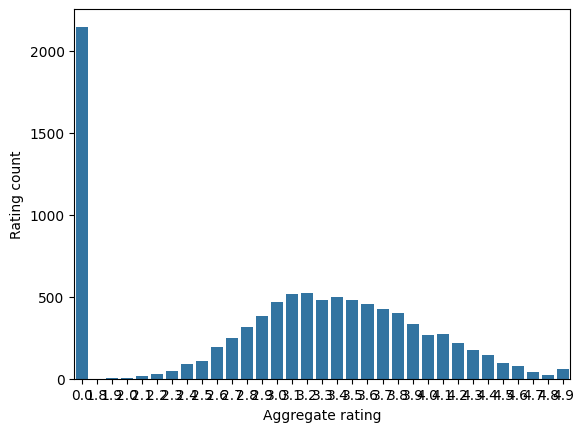

In [18]:
# plotting the above to get a visual feel of the data.
sns.barplot(x = "Aggregate rating", y = "Rating count", data = ratings)

In [19]:
ratings["Rating color"].value_counts()

,count
Rating color,
Orange,10
Red,7
Yellow,5
Green,5
Dark Green,5
White,1


<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

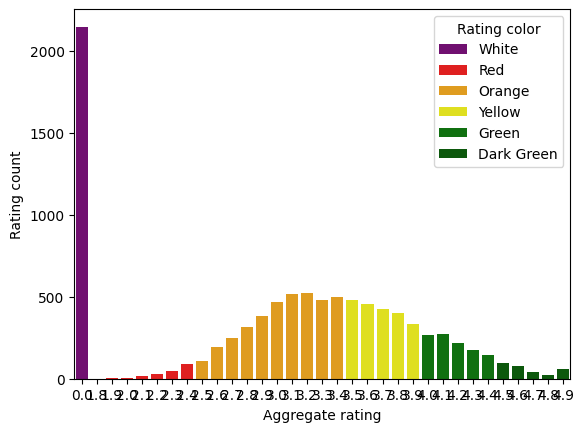

In [20]:
sns.barplot(x = "Aggregate rating", y = "Rating count",hue ="Rating color" ,data = ratings, palette=["purple", "Red", "Orange", "Yellow","Green", "DarkGreen"])

<ipython-input-21-d91dbe1ed779>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Rating color", data = ratings, palette=["purple", "Red", "Orange", "Yellow","Green", "DarkGreen"])


<Axes: xlabel='Rating color', ylabel='count'>

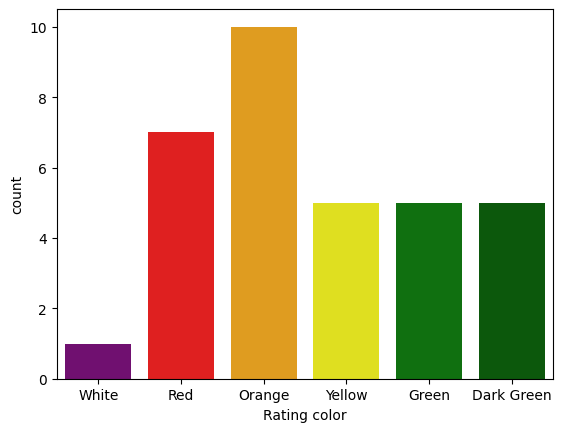

In [21]:
sns.countplot(x = "Rating color", data = ratings, palette=["purple", "Red", "Orange", "Yellow","Green", "DarkGreen"])

In [22]:
final_df[final_df["Rating color"]=="White"].groupby("Country").size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [23]:
final_df["Currency"].value_counts()

,count
Currency,
Indian Rupees(Rs.),8652
Dollar($),482
Pounds(£),80
Brazilian Real(R$),60
Emirati Diram(AED),60
Rand(R),60
NewZealand($),40
Turkish Lira(TL),34
Botswana Pula(P),22


In [24]:
grouped = final_df.groupby('Country')['Currency'].unique()

In [25]:
grouped

,Currency
Country,
Australia,[Dollar($)]
Brazil,[Brazilian Real(R$)]
Canada,[Dollar($)]
India,[Indian Rupees(Rs.)]
Indonesia,[Indonesian Rupiah(IDR)]
New Zealand,[NewZealand($)]
Phillipines,[Botswana Pula(P)]
Qatar,[Qatari Rial(QR)]
Singapore,[Dollar($)]


In [26]:
final_df[['Country','Currency']].groupby(["Currency","Country"]).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [27]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [28]:
city_names = final_df.City.value_counts().index
city_values = final_df.City.value_counts().values

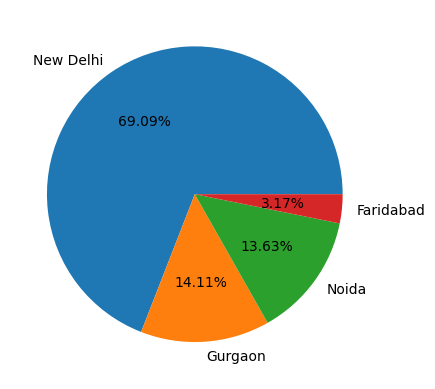

In [29]:
plt.pie(city_values[:4], labels = city_names[:4], autopct="%1.2f%%")
plt.show()

In [31]:
pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 74.2 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62567 sha256=d0592e4d7164c9c2dc76746d1f

In [32]:
import dtale

In [34]:
dtale.show(final_df)

http://271d058baca2:40000/dtale/main/2